In [5]:
#Importing All the Needed Libraries
%reset -f
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

from scipy import stats



In [6]:
df = pd.read_excel('1 Radio Lab RF chain.xlsx',sheet_name = "Filter")

# Step 2: Extract Frequency and Voltage columns
frequency = df['Frequency']
#voltage = df['V(mV)']
voltage = df['Gain']

In [7]:

# Extract columns 'x' and 'y'
x_column = df['Frequency'].values  # Replace 'x' with the exact name of the column in the Excel file
y_column = df['Gain'].values  # Replace 'y' with the exact name of the column in the Excel file

# Print or work with the extracted columns
print(x_column)
print(y_column)


[ 20  40  60  80 100 120 140 160 180 200 220 240 260 280 300 320 340 360
 380 400 420 440 460 480 500 520 540 560 580 600 620 640 660 680 700 720
 740 760 780 800]
[ -0.14  -0.13  -0.15  -0.27  -0.33  -0.24  -0.36  -0.51  -0.3   -0.36
  -0.66  -0.53  -0.35  -0.65  -0.75  -0.6   -0.67  -0.96  -0.83  -1.
  -1.26  -1.25  -1.34  -1.92  -2.39  -2.54  -3.43  -5.23  -7.21  -9.05
 -14.26 -21.   -23.51 -25.6  -32.33 -38.88 -41.1  -37.25 -33.6  -32.74]


In [8]:
def find_x_for_y(x_values, y_values, target_y, tolerance=1e-6):
    """
    Find all x values corresponding to a specific y value, including interpolated values.

    Args:
    x_values (np.array): Array of x values.
    y_values (np.array): Array of y values (e.g., sin(x)).
    target_y (float): The target y value to find the corresponding x value(s) for.
    tolerance (float): Tolerance to handle floating-point comparisons.

    Returns:
    np.array: Array of x values corresponding to the target_y.
    """
    # Ensure x and y are numpy arrays
    x_values = np.asarray(x_values)
    y_values = np.asarray(y_values)

    # Find indices where the exact y values match (within tolerance)
    exact_indices = np.where(np.abs(y_values - target_y) <= tolerance)[0]
    
    # Initialize list to store found x values
    x_results = x_values[exact_indices].tolist()
    
    # Sort x and y values for interpolation (if not already sorted)
    sorted_indices = np.argsort(x_values)
    sorted_x = x_values[sorted_indices]
    sorted_y = y_values[sorted_indices]

    # Interpolate function
    interp_func = interp1d(sorted_y, sorted_x, bounds_error=False, fill_value="extrapolate", kind='linear')

    # Check interpolation results between every pair of points
    for i in range(len(sorted_y) - 1):
        # If the target y is between sorted_y[i] and sorted_y[i+1], interpolate
        if (sorted_y[i] <= target_y <= sorted_y[i+1]) or (sorted_y[i] >= target_y >= sorted_y[i+1]):
            x_interpolated = interp_func(target_y)
            x_results.append(x_interpolated)
    
    # Remove duplicates and return sorted x values
    return np.unique(x_results)

X values corresponding to max_gain = -0.09: [20.]
X values corresponding to y = [-3.09]: [526.4084507]


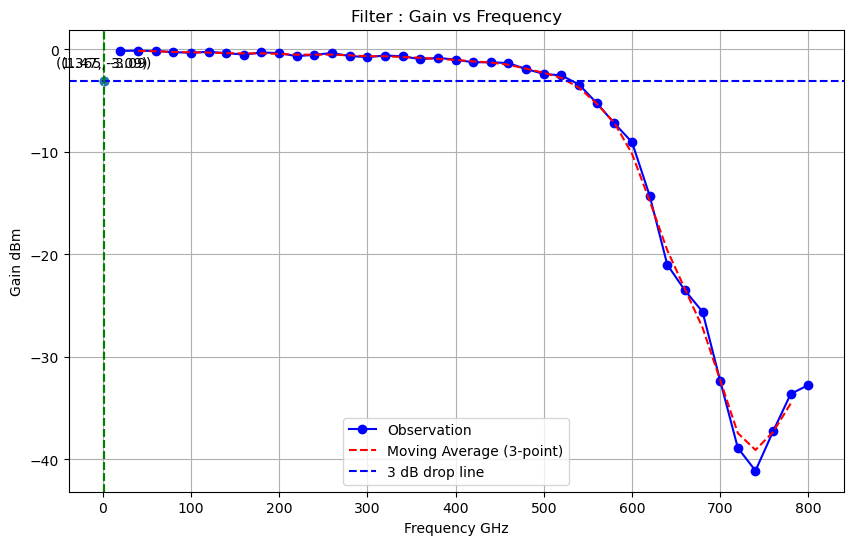

In [9]:


# Function to calculate moving average
def moving_average(y_values, window_size=3):
    """
    Calculate moving average with a specified window size.
    By default, a 3-point moving average is used.

    Args:
    y_values (list or np.array): List or array of y-values.
    window_size (int): The window size for the moving average.

    Returns:
    np.array: The moving average values with NaN for points that don't have enough neighbors.
    """
    return np.convolve(y_values, np.ones(window_size) / window_size, mode='same')


# Calculate the moving average with a 3-point window
y_moving_avg = moving_average(y_column, window_size=3)

# Find the maximum gain
max_gain = np.max(y_moving_avg)

# Calculate the 3 dBm drop from the maximum gain
drop_3db = float(max_gain - 3)

# Find the x value(s) for a specific interpolated y value, say y = 13 and y = 11
target_y = [drop_3db]

x_for_target_y = find_x_for_y(x_column, y_moving_avg, max_gain)

print(f"X values corresponding to max_gain = {max_gain}: {x_for_target_y}")

target_y = [drop_3db]

x_for_target_y = find_x_for_y(x_column, y_moving_avg, target_y)

print(f"X values corresponding to y = {target_y}: {x_for_target_y}")



# Plot original 'y' values and moving average
plt.figure(figsize=(10, 6))
plt.plot(x_column, y_column, label='Observation', color='blue', marker='o')
plt.plot(x_column[1:-1], y_moving_avg[1:-1], label='Moving Average (3-point)', color='red', linestyle='--')
#plt.axhline(y=drop_3db, color='black', linestyle='--', label='3 dBm drop from Max Gain')

# Sample data (replace with your actual values)
x_values = np.array([1.47, 1.365])  # Frequencies in GHz
y_values = np.array([drop_3db, drop_3db])  # 3 dB drop values

# Find bandwidth (difference between the two frequencies)

# Plot the scatter plot with markers
#plt.scatter(x_values, y_values, color='red', label='3 dB drop points')

# Plot horizontal line at the 3 dB drop level
plt.axhline(y=drop_3db, color='blue', linestyle='--', label='3 dB drop line')

# Add vertical lines from points to horizontal line
for x in x_values:
    plt.axvline(x=x, color='green', linestyle='--')

# Annotate the points on the scatter plot
for i, (x, y) in enumerate(zip(x_values, y_values)):
    plt.annotate(f'({x}, {y})', (x, y), textcoords="offset points", xytext=(0, 10), ha='center')

plt.scatter([1.47,1.365],[drop_3db,drop_3db])

# Add labels and title
plt.xlabel('Frequency GHz')
plt.ylabel('Gain dBm')
plt.title('Filter : Gain vs Frequency')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()


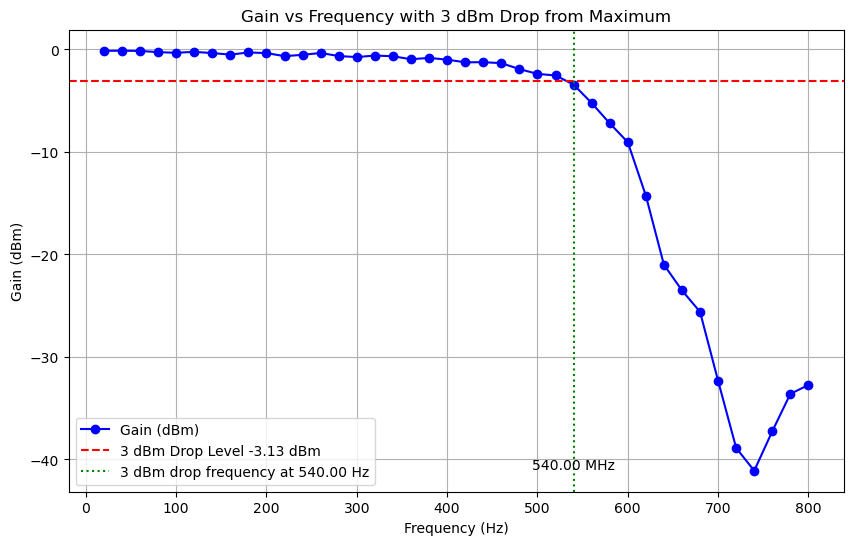

Frequencies at 3 dBm drop from the maximum gain:
540


In [10]:
# Find the maximum gain
max_gain = np.max(y_column)

# Calculate the 3 dBm drop from the maximum gain
drop_3db = max_gain - 3

# Find the x values (frequencies) where the gain drops by 3 dBm
indices = np.where(y_column <= drop_3db)[0][0]  # Indices where the gain is less than or equal to 3 dBm below the max
frequencies_at_3db = x_column[indices]

# Plot the original gain and the 3 dBm drop level
plt.figure(figsize=(10, 6))
plt.plot(x_column, y_column, label='Gain (dBm)', color='blue', marker='o')
plt.axhline(y=drop_3db, color='red', linestyle='--', label=f'3 dBm Drop Level {drop_3db:.2f} dBm')

# Draw vertical lines and annotate the corresponding x-values
#for i in indices:
fval = x_column[indices]
plt.axvline(x=x_column[indices], color='green', linestyle=':', ymax=(y_column[indices] - plt.ylim()[0]) , label = f"3 dBm drop frequency at {fval:.2f} Hz")  # Draw vertical line
plt.text(x_column[indices], y_column[indices] - 37.5, f'{x_column[indices]:.2f} MHz', color='black', ha='center')  # Annotate the x value

# Add labels, title, and legend
plt.xlabel('Frequency (Hz)')
plt.ylabel('Gain (dBm)')
plt.title('Gain vs Frequency with 3 dBm Drop from Maximum')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

# Print the frequencies at 3 dBm drop
print("Frequencies at 3 dBm drop from the maximum gain:")
print(frequencies_at_3db)

In [11]:
w0 = [200,500]
p0 = [-8.71,-8.3]

w = [300,700]
p = [-24.75,-23.73]

w_natural = [200,500]
p_natural = [-24.75,-77.67]



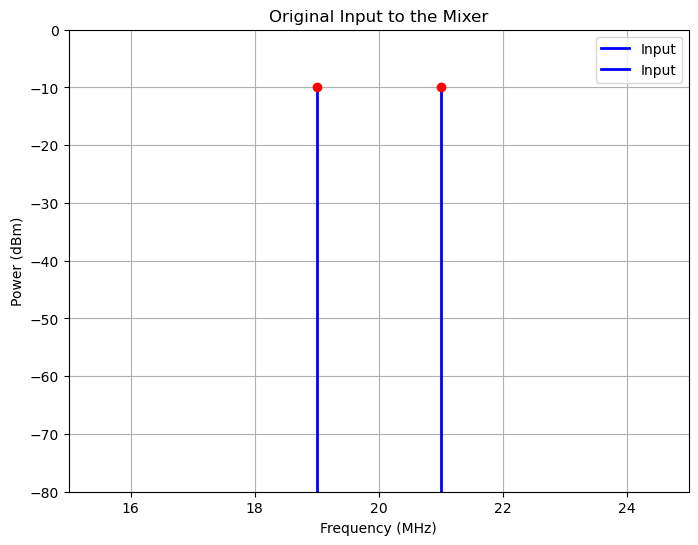

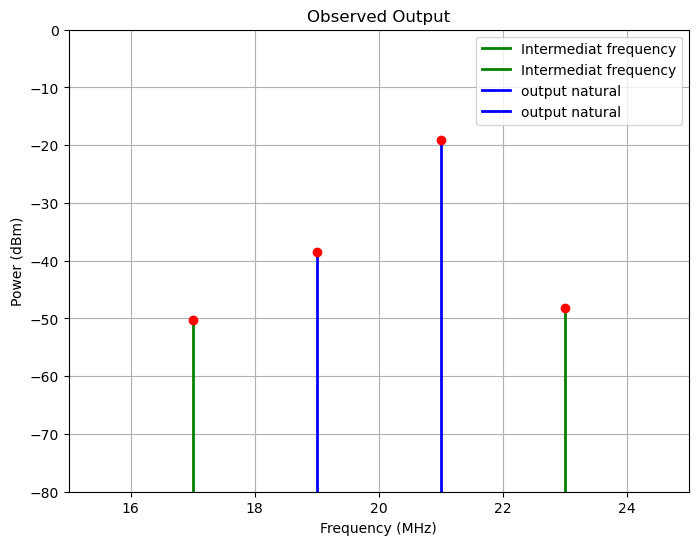

In [12]:
import matplotlib.pyplot as plt

# Data for original input frequencies and power
w0 = [19,21]
p0 = [-10,-10]

# Data for observed frequencies and power through the mixer
w = [17, 23]
p = [-50.26, -48.23]

# Data for natural frequencies and power
w_natural = [19, 21]
p_natural = [-38.54, -19.11]

# Function to plot vertical lines from -100 dBm to the data points
def plot_spectrum(w, p, title,ls,l):
    
    # Plot vertical lines from -100 dBm to the respective points
    for i in range(len(w)):
        plt.plot([w[i], w[i]], [-100, p[i]], ls, lw=2, label =f"{l}" )
        plt.plot(w[i], p[i], 'ro')  # Plot the data point
    
    # Set plot title and labels
    plt.title(title)
    plt.xlabel('Frequency (MHz)')
    plt.ylabel('Power (dBm)')
    plt.ylim([-80, 0])
    plt.xlim(15,25)
    plt.grid(True)
    plt.legend()
    
plt.figure(figsize=(8, 6))

# Plot for original input (w0, p0)
plot_spectrum(w0, p0, 'Original Input to the Mixer',"-b","Input")
plt.show()
plt.figure(figsize=(8, 6))

# Plot for observed output (w, p)
plot_spectrum(w, p, 'Observed Output: w and p',"-g","Intermediat frequency")

# Plot for natural frequencies (w_natural, p_natural)
plot_spectrum(w_natural, p_natural, 'Observed Output',"-b","output natural")
plt.show()

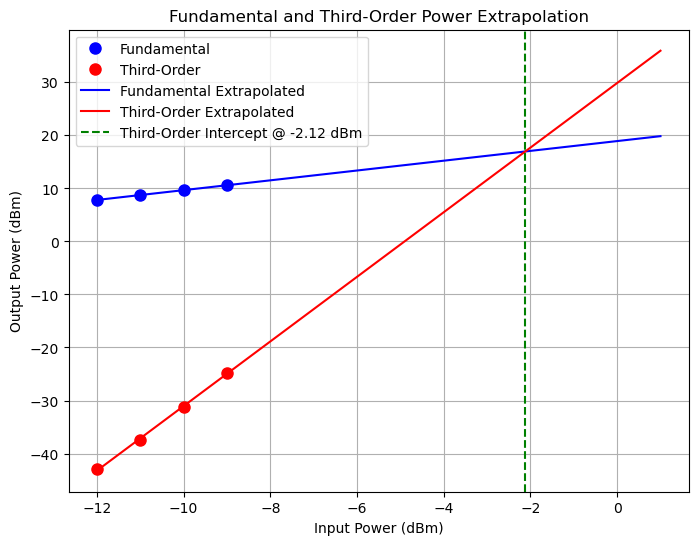

(-2.118443971356687, 16.963380104509387)

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Given data
input_power = np.array([-12, -11, -10, -9])
third_order_power = np.array([-42.99,-37.435,-31.23,-24.75])
fundamental_power = np.array([7.78,8.805,9.66,10.58])

# Linear regression for both fundamental and third-order powers
slope_fund, intercept_fund, _, _, _ = linregress(input_power, fundamental_power)
slope_third, intercept_third, _, _, _ = linregress(input_power, third_order_power)

# Extrapolating the lines
input_power_extrapolated = np.linspace(min(input_power), max(input_power) + 10, 100)

fundamental_extrapolated = slope_fund * input_power_extrapolated + intercept_fund
third_order_extrapolated = slope_third * input_power_extrapolated + intercept_third

# Finding the third-order intercept point
intercept_power = (intercept_fund - intercept_third) / (slope_third - slope_fund)
intercept_value_fund = slope_fund * intercept_power + intercept_fund
intercept_value_third = slope_third * intercept_power + intercept_third

# Plotting the results
plt.figure(figsize=(8,6))
plt.plot(input_power, fundamental_power, 'bo', label='Fundamental', markersize=8)
plt.plot(input_power, third_order_power, 'ro', label='Third-Order', markersize=8)
plt.plot(input_power_extrapolated, fundamental_extrapolated, 'b-', label='Fundamental Extrapolated')
plt.plot(input_power_extrapolated, third_order_extrapolated, 'r-', label='Third-Order Extrapolated')
plt.axvline(x=intercept_power, color='green', linestyle='--', label=f'Third-Order Intercept @ {intercept_power:.2f} dBm')
plt.title('Fundamental and Third-Order Power Extrapolation')
plt.xlabel('Input Power (dBm)')
plt.ylabel('Output Power (dBm)')
plt.legend()
plt.grid(True)

# Show plot
plt.show()

(intercept_power, intercept_value_fund)


    I/P(dBm)  O/P(dBm)  Unnamed: 2  \
0       14.0     21.60         NaN   
1       13.0     21.60         NaN   
2       12.0     21.66         NaN   
3       11.0     21.60         NaN   
4       10.0     21.50         NaN   
5        9.0     21.24         NaN   
6        8.0     20.76         NaN   
7        7.0     20.00         NaN   
8        6.0     19.40         NaN   
9        5.0     18.03         NaN   
10       0.0     12.04         NaN   
11      -5.0      7.24         NaN   
12     -10.0      2.30         NaN   
13     -15.0     -2.60         NaN   
14     -20.0     -7.50         NaN   
15     -30.0    -17.50         NaN   
16     -40.0    -27.57         NaN   
17     -45.0    -32.50         NaN   
18     -55.0    -42.60         NaN   
19     -60.0    -47.60         NaN   
20     -61.0    -48.30         NaN   
21     -62.0    -49.20         NaN   
22     -63.0    -50.10         NaN   
23     -64.0    -51.40         NaN   
24     -65.0    -52.10         NaN   
25     -66.0

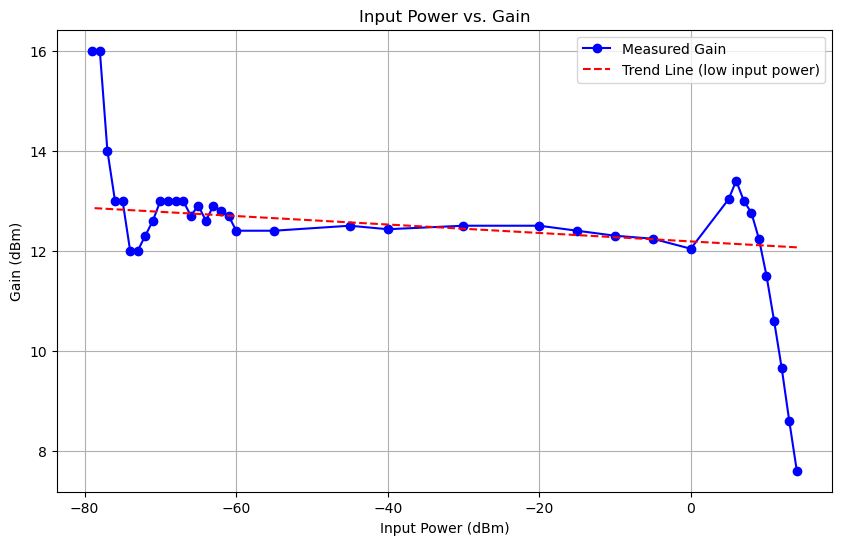

[14.0, 13.0, 12.0, 11.0]
1 dB Compression Point is at [14.0, 13.0, 12.0, 11.0] dBm


In [14]:

# Load the Excel file
file_path = '1 Radio Lab RF chain.xlsx'  # Replace with your actual file path
df = pd.read_excel(file_path, sheet_name='Amplifier')  # Load data from 'Sheet1'
print(df)
pout_array = df['O/P(dBm)'].to_numpy()

# Extract 'Pin' and 'Gain' columns into NumPy arrays
pin_array = df['I/P(dBm)'].to_numpy()
gain_array = (pout_array - pin_array)

# Print the arrays
print("Pin Array:", pin_array)
print("Gain Array:", gain_array)

# Input power and gain data (replace with your actual data)
power_in = pin_array
gain = gain_array
# Plot the data
plt.figure(figsize=(10,6))
plt.plot(power_in, gain, 'bo-', label='Measured Gain')
plt.xlabel('Input Power (dBm)')
plt.ylabel('Gain (dBm)')
plt.title('Input Power vs. Gain')

# Trend line for the first 10 points (small-signal gain region)
initial_power = power_in [10:-10]
initial_gain = gain [10:-10]

# Fit a linear trend line
slope, intercept, r_value, p_value, std_err = stats.linregress(initial_power, initial_gain)
trend_line = intercept + slope * power_in

# Plot the trend line
plt.plot(power_in, trend_line, 'r--', label='Trend Line (low input power)')

# Calculate the 1 dB compression point
compression_point = []
for i in range(0, len(gain)):
    expected_gain = intercept + slope * power_in[i]
    actual_gain = gain[i]
    if actual_gain <= expected_gain - 1:  # 1 dB compression condition
        compression_point.append(power_in[i])

# Highlight the 1 dB compression point
#if compression_point is not None:
#plt.axvline(compression_point, color='g', linestyle='--', label=f'1 dB Compression at {compression_point} dBm')
#    plt.legend()

# Show plot
plt.grid(True)
plt.legend()
plt.show()
print(compression_point)
# Print the compression point
if compression_point is not None:
    print(f"1 dB Compression Point is at {compression_point} dBm")
else:
    print("1 dB Compression Point not found within the data range.")


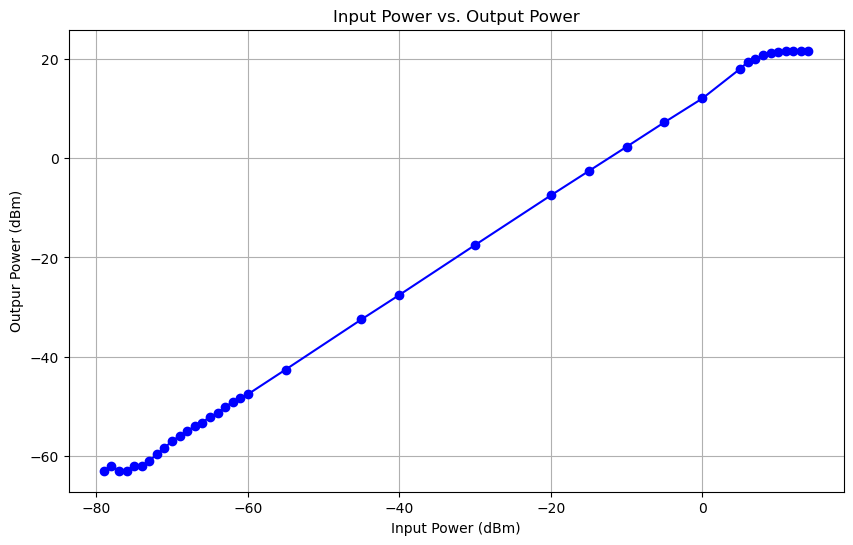

In [31]:
# Load the Excel file
file_path = '1 Radio Lab RF chain.xlsx'  # Replace with your actual file path
df = pd.read_excel(file_path, sheet_name='Amplifier')  # Load data from 'Amplifier' sheet

# Extract data
pin_array = df['I/P(dBm)'].to_numpy()
pout_array = df['O/P(dBm)'].to_numpy()
gain_array = pout_array - pin_array  # Compute gain
# Plot the data
plt.figure(figsize=(10,6))
plt.plot(power_in,pout_array, 'bo-', label='Measured Gain')
plt.xlabel('Input Power (dBm)')
plt.ylabel('Outpur Power (dBm)')
plt.title('Input Power vs. Output Power')
plt.grid(True)
plt.show()

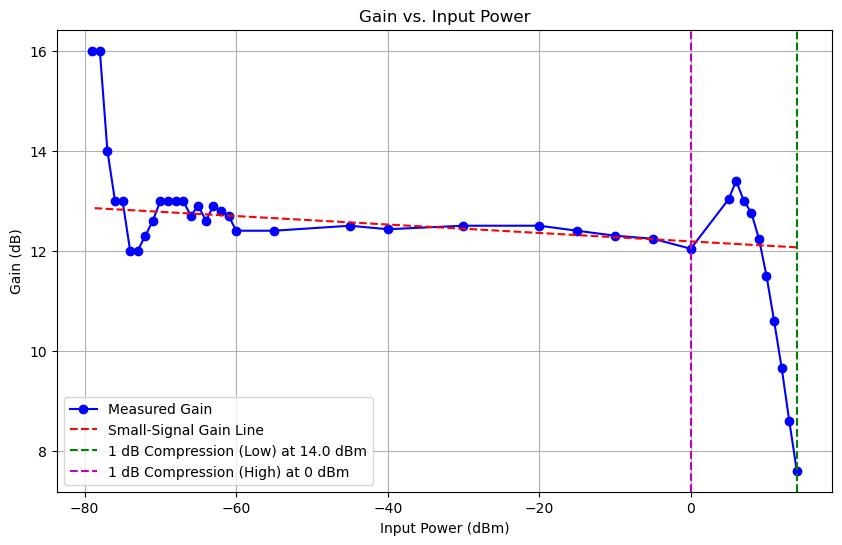

1 dB Compression Point (Low Power) = 14.0 dBm
1 dB Compression Point (High Power) = 0 dBm


In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Load the Excel file
file_path = '1 Radio Lab RF chain.xlsx'  # Replace with your actual file path
df = pd.read_excel(file_path, sheet_name='Amplifier')  # Load data from 'Amplifier' sheet

# Extract data
pin_array = df['I/P(dBm)'].to_numpy()
pout_array = df['O/P(dBm)'].to_numpy()
gain_array = pout_array - pin_array  # Compute gain

# Plot the Gain vs Input Power
plt.figure(figsize=(10, 6))
plt.plot(pin_array, gain_array, 'bo-', label='Measured Gain')
plt.xlabel('Input Power (dBm)')
plt.ylabel('Gain (dB)')
plt.title('Gain vs. Input Power')
plt.grid(True)

# Fit a linear trend line for **low power** region (small-signal gain)
low_power_region = pin_array[10:-10]  # First 10 points
low_gain_region = gain_array[10:-10]

slope, intercept, r_value, p_value, std_err = stats.linregress(low_power_region, low_gain_region)
trend_line = intercept + slope * pin_array

# Find 1 dB compression at low power
low_compression_point = None
for i in range(len(pin_array)):
    expected_gain = intercept + slope * pin_array[i]
    actual_gain = gain_array[i]
    if actual_gain <= expected_gain - 1:  # 1 dB drop
        low_compression_point = pin_array[i]
        break  # Stop at first occurrence

# Find 1 dB compression at high power
high_compression_point = np.where(actual_gain <= intercept + slope * pin_array -1)[0][0]
#low_compression_point = np.where(actual_gain >= intercept + slope * pin_array +1)[0]

# Plot trend line
plt.plot(pin_array, trend_line, 'r--', label='Small-Signal Gain Line')

# Mark 1 dB compression points
if low_compression_point is not None:
    plt.axvline(low_compression_point, color='g', linestyle='--', label=f'1 dB Compression (Low) at {low_compression_point} dBm')

if high_compression_point is not None:
    plt.axvline(high_compression_point, color='m', linestyle='--', label=f'1 dB Compression (High) at {high_compression_point} dBm')

plt.legend()
plt.show()

# Print results
print(f"1 dB Compression Point (Low Power) = {low_compression_point} dBm")
print(f"1 dB Compression Point (High Power) = {high_compression_point} dBm")


In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline
from scipy import stats

# Load the Excel file
file_path = '1 Radio Lab RF chain.xlsx'  # Replace with your actual file path
df = pd.read_excel(file_path, sheet_name='Amplifier')  # Load data from 'Amplifier' sheet

# Extract data
pin_array = df['I/P(dBm)'].to_numpy()
pout_array = df['O/P(dBm)'].to_numpy()
gain_array = pout_array - pin_array  # Compute gain

# Ensure pin_array is sorted (to avoid UnivariateSpline error)
sorted_indices = np.argsort(pin_array)
pin_array = pin_array[sorted_indices]
gain_array = gain_array[sorted_indices]

# Apply smoothing using spline interpolation
spline = CubicSpline(pin_array, gain_array)  # s controls smoothness
pin_smooth = np.linspace(pin_array.min(), pin_array.max(), 500)
gain_smooth = spline(pin_smooth)

# Fit a linear trend line for small-signal region
small_signal_mask = pin_array > (pin_array.min() + 5) and pin_array < (pin_array.max() - 5)  # First few low-power points
low_power_region = pin_array[small_signal_mask]
low_gain_region = gain_array[small_signal_mask]

slope, intercept, _, _, _ = stats.linregress(low_power_region, low_gain_region)
trend_line = intercept + slope * pin_smooth

# Find 1 dB compression point
expected_gain = intercept + slope * pin_smooth
compression_idx = np.where(gain_smooth <= expected_gain - 1)[0]

low_compression_point = pin_smooth[compression_idx[0]] if len(compression_idx) > 0 else None
high_compression_point = pin_smooth[compression_idx[-1]] if len(compression_idx) > 0 else None

# Plot Gain vs Input Power
plt.figure(figsize=(10, 6))
plt.plot(pin_array, gain_array, 'bo', label='Measured Gain')
plt.plot(pin_smooth, gain_smooth, 'b-', label='Smoothed Gain')
plt.plot(pin_smooth, trend_line, 'r--', label='Small-Signal Gain Line')

# Mark 1 dB compression points
if low_compression_point:
    plt.axvline(low_compression_point, color='g', linestyle='--', label=f'1 dB Compression (Low) at {low_compression_point:.2f} dBm')
if high_compression_point:
    plt.axvline(high_compression_point, color='m', linestyle='--', label=f'1 dB Compression (High) at {high_compression_point:.2f} dBm')

# Labels and Formatting
plt.xlabel('Input Power (dBm)')
plt.ylabel('Gain (dB)')
plt.title('Smoothed Gain vs. Input Power with 1 dB Compression Points')
plt.legend()
plt.grid(True)
plt.show()

# Print results
print(f"1 dB Compression Point (Low Power) = {low_compression_point:.2f} dBm")
print(f"1 dB Compression Point (High Power) = {high_compression_point:.2f} dBm")


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

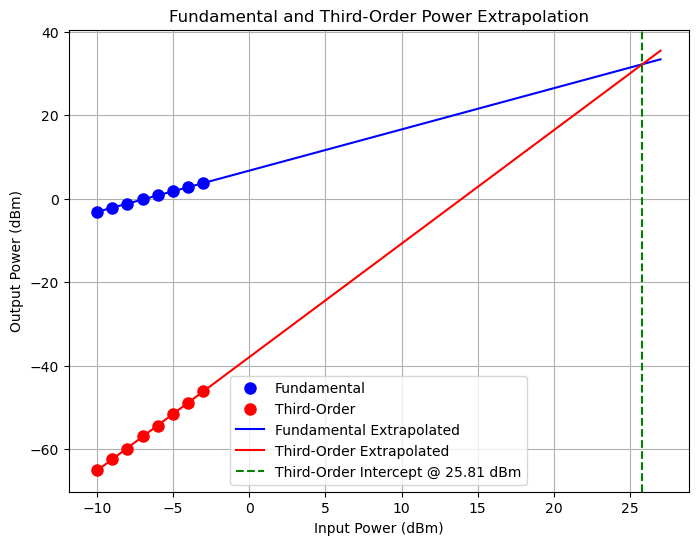

(25.80971854702911, 32.20262723804942)

In [88]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Given data
input_power = np.array([-10,-9,-8,-7,-6,-5,-4,-3])
third_order_power = np.array([-65,-62.5,-60,-57,-54.5,-51.5,-49,-46])
fundamental_power = np.array([-3.195,-2.195,-1.195,-0.21,0.765,1.76,2.75,3.725])

# Linear regression for both fundamental and third-order powers
slope_fund, intercept_fund, _, _, _ = linregress(input_power, fundamental_power)
slope_third, intercept_third, _, _, _ = linregress(input_power, third_order_power)

# Extrapolating the lines
input_power_extrapolated = np.linspace(min(input_power), max(input_power) + 30, 100)

fundamental_extrapolated = slope_fund * input_power_extrapolated + intercept_fund
third_order_extrapolated = slope_third * input_power_extrapolated + intercept_third

# Finding the third-order intercept point
intercept_power = (intercept_fund - intercept_third) / (slope_third - slope_fund)
intercept_value_fund = slope_fund * intercept_power + intercept_fund
intercept_value_third = slope_third * intercept_power + intercept_third

# Plotting the results
plt.figure(figsize=(8,6))
plt.plot(input_power, fundamental_power, 'bo', label='Fundamental', markersize=8)
plt.plot(input_power, third_order_power, 'ro', label='Third-Order', markersize=8)
plt.plot(input_power_extrapolated, fundamental_extrapolated, 'b-', label='Fundamental Extrapolated')
plt.plot(input_power_extrapolated, third_order_extrapolated, 'r-', label='Third-Order Extrapolated')
plt.axvline(x=intercept_power, color='green', linestyle='--', label=f'Third-Order Intercept @ {intercept_power:.2f} dBm')
plt.title('Fundamental and Third-Order Power Extrapolation')
plt.xlabel('Input Power (dBm)')
plt.ylabel('Output Power (dBm)')
plt.legend()
plt.grid(True)

# Show plot
plt.show()

(intercept_power, intercept_value_fund)


In [76]:
low_compression_point

array([], dtype=int64)

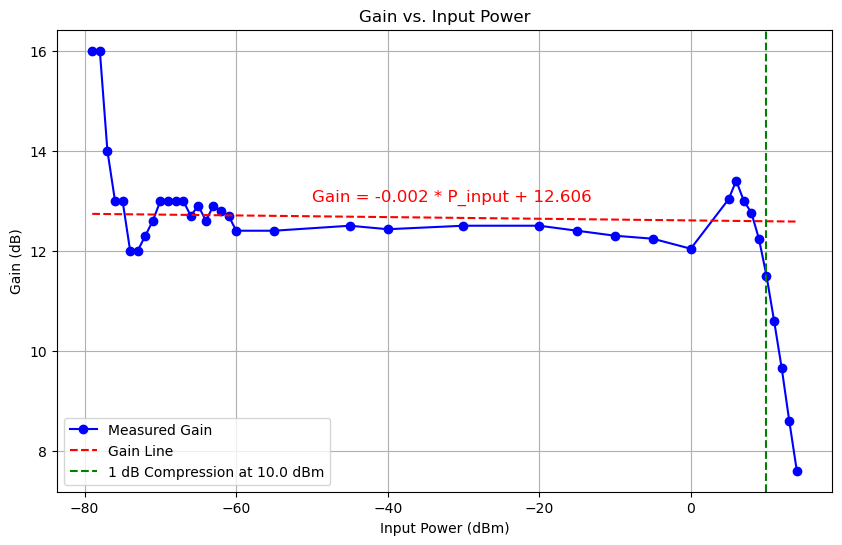

1 dB Compression Point (Low Power) = 10.0 dBm
1 dB Compression Point (High Power) = 14.0 dBm


In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Load the Excel file
file_path = '1 Radio Lab RF chain.xlsx'  # Replace with your actual file path
df = pd.read_excel(file_path, sheet_name='Amplifier')  # Load data from 'Amplifier' sheet

# Extract data
pin_array = df['I/P(dBm)'].to_numpy()
pout_array = df['O/P(dBm)'].to_numpy()
gain_array = pout_array - pin_array  # Compute gain

# Sort the data based on increasing input power
sorted_indices = np.argsort(pin_array)  # Get sorting order
pin_array = pin_array[sorted_indices]
pout_array = pout_array[sorted_indices]
gain_array = gain_array[sorted_indices]

# Plot Gain vs Input Power
plt.figure(figsize=(10, 6))
plt.plot(pin_array, gain_array, 'bo-', label='Measured Gain')
plt.xlabel('Input Power (dBm)')
plt.ylabel('Gain (dB)')
plt.title('Gain vs. Input Power')
plt.grid(True)

# Fit a linear trend line for **low power region** (small-signal gain)
low_power_region = pin_array[10:-10]  # First 10 points
low_gain_region = gain_array[10:-10]

slope, intercept, _, _, _ = stats.linregress(low_power_region, low_gain_region)
trend_line = intercept + slope * pin_array

# Find 1 dB compression at low power
low_compression_point = None
for i in range(len(pin_array)):
    expected_gain = intercept + slope * pin_array[i]
    actual_gain = gain_array[i]
    if actual_gain <= expected_gain - 1:  # 1 dB drop
        low_compression_point = pin_array[i]
        break  # Stop at first occurrence

# Find 1 dB compression at high power
high_compression_point = None
for i in range(len(pin_array) - 1, -1, -1):  # Iterate in reverse
    expected_gain = intercept + slope * pin_array[i]
    actual_gain = gain_array[i]
    if actual_gain <= expected_gain - 1:  # 1 dB drop
        high_compression_point = pin_array[i]
        break  # Stop at first occurrence

# Plot trend line
plt.plot(pin_array, trend_line, 'r--', label='Gain Line')

# Mark 1 dB compression points
if low_compression_point is not None:
    plt.axvline(low_compression_point, color='g', linestyle='--', label=f'1 dB Compression at {low_compression_point} dBm')

gain_eq = f"Gain = {slope:.3f} * P_input + {intercept:.3f}"
plt.text(-50, 13, gain_eq, fontsize=12, color='red')

# if high_compression_point is not None:
#     plt.axvline(high_compression_point, color='m', linestyle='--', label=f'1 dB Compression (High) at {high_compression_point} dBm')

plt.legend()
plt.grid(True)
plt.show()

# Print results
print(f"1 dB Compression Point (Low Power) = {low_compression_point} dBm")
print(f"1 dB Compression Point (High Power) = {high_compression_point} dBm")


    Angle(deg)  Power(dBm)
0          -90  -42.000000
1          -80  -46.000000
2          -70  -45.000000
3          -60  -50.000000
4          -50  -41.800000
5          -40  -35.200000
6          -30  -30.900000
7          -20  -28.700000
8          -10  -28.370000
9           -9  -28.190000
10          -8  -27.930000
11          -7  -27.780000
12          -6  -27.900000
13          -5  -27.700000
14          -4  -27.800000
15          -3  -27.600000
16          -2  -27.500000
17          -1  -27.510000
18           0  -26.533333
19           1  -26.900000
20           2  -26.700000
21           3  -26.700000
22           4  -26.800000
23           5  -27.120000
24           6  -26.700000
25           7  -26.460000
26           8  -26.400000
27           9  -26.090000
28          10  -26.270000
29          20  -26.600000
30          30  -28.100000
31          40  -30.200000
32          50  -34.100000
33          60  -41.200000
34          70  -47.000000
35          80  -44.000000
3

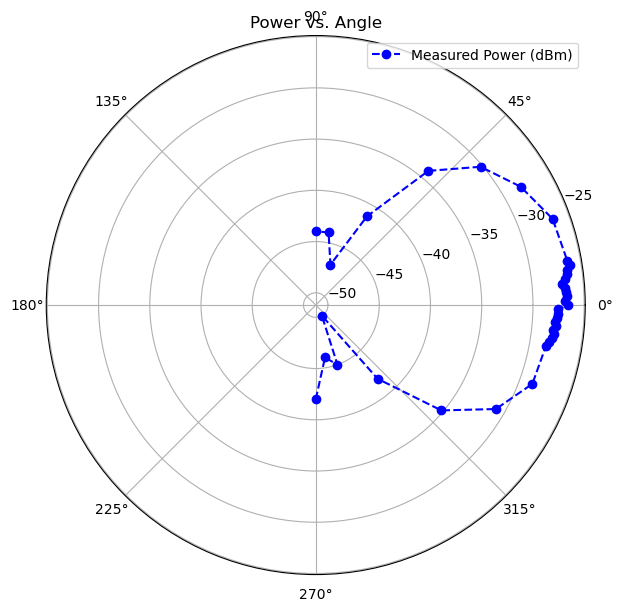

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the Excel file
file_path = '1 Radio Lab RF chain.xlsx'  # Replace with your actual file path
df = pd.read_excel(file_path, sheet_name='antene')  # Load data from 'Sheet1'

print(df)
angel = df['Angle(deg)'].to_numpy()

# Extract 'Pin' and 'Gain' columns into NumPy arrays
power = df['Power(dBm)'].to_numpy()


# plot the data in polar
plt.figure(figsize=(7,7))
plt.polar(np.radians(angel), power, 'bo--', label='Measured Power (dBm)')
#plt.xlabel('Angle (deg)')
#plt.ylabel('Power (dBm)')
#plt.title('Power vs. Angle')

#label the radius ang angle
# like we labele x and y axis in polar

plt.title('Power vs. Angle')
plt.legend()

plt.grid(True)
plt.show()


[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252
 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270
 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287 288
 289 290 291 292 293 294 295 296 297 298 299]
[ 55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 

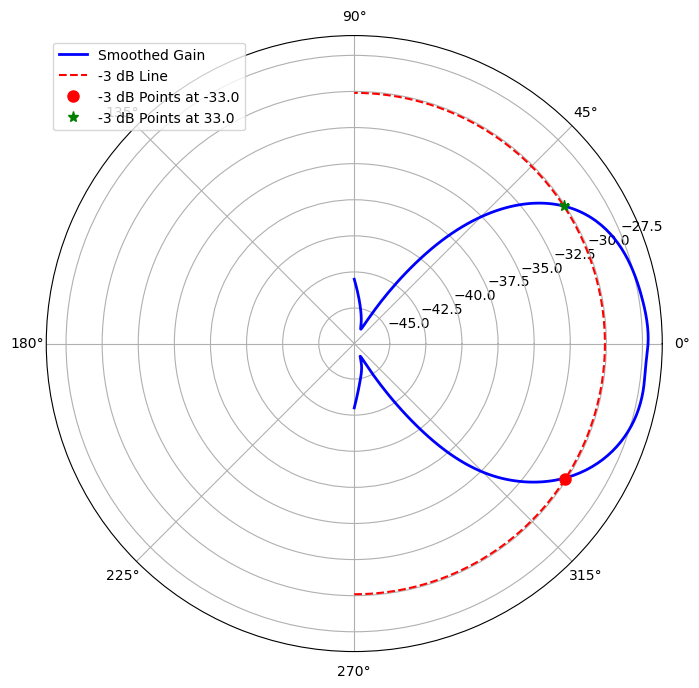

In [67]:
import pandas as pd
import numpy as np
from scipy.interpolate import UnivariateSpline
import matplotlib.pyplot as plt

# Load the Excel file
file_path = '1 Radio Lab RF chain.xlsx'  # Replace with your actual file path
df = pd.read_excel(file_path, sheet_name='antene')  # Load data from 'Sheet1'

angle_deg = df['Angle(deg)'].to_numpy()
power = df['Power(dBm)'].to_numpy()
power = ( power+np.flip(power) ) /2

# Interpolation for Smoothing
angle_smooth = np.linspace(-90, 90, 300)  # Generate smooth angle points
power_spline = UnivariateSpline(angle_deg, power, s=1)
power_smooth = power_spline(angle_smooth)  # Get smooth power values




angle_rad = np.radians(angle_smooth)
threshold = np.max(power_smooth) - 3

indices_below_threshold = np.where(power_smooth <= threshold)[0]
#indices_below_threshold = np.sort(indices_below_threshold)

print(indices_below_threshold)

index = np.where(power_smooth[:150] <= threshold)[0]
smaller_angle = angle_smooth[index[-1] ]
index = np.where(power_smooth[150:] <= threshold)[0] 
print(index)
greater_angle = angle_smooth[index[0]+150]

# Print results
print(f"Maximum Power: {np.max(power_smooth):.2f} dBm")
print(f"-3 dB Threshold: {threshold:.2f} dBm")
print(smaller_angle)
print(greater_angle)



plt.figure(figsize=(8, 8))
ax = plt.subplot(111, projection='polar')
# Smooth Power Curve
ax.plot(np.radians(angle_smooth), power_smooth, 'b-', linewidth=2, label='Smoothed Gain')
# Draw a -3 dB Threshold Line
ax.plot(angle_rad, [threshold] * len(angle_rad), 'r--', label='-3 dB Line')


# Highlight -3 dB Points
if smaller_angle is not None:
    ax.plot(np.radians(smaller_angle), threshold, 'ro', markersize=8, label=f'-3 dB Points at {np.round(smaller_angle)}')
if greater_angle is not None:
    ax.plot(np.radians(greater_angle), threshold, 'g*', markersize=8,label=f'-3 dB Points at {np.round(greater_angle)}')


plt.legend()
plt.grid(True)
plt.show()


    Angle(deg)  Power(dBm)  Frequency
0            0       -29.8        300
1           10       -29.8        300
2           20       -30.3        300
3           30       -30.9        300
4           40       -30.8        300
5           50       -30.5        300
6           60       -31.9        300
7           70       -30.9        300
8           80       -29.7        300
9           90       -30.4        300
10         100       -32.6        300
11         110       -35.1        300
12         120       -35.7        300
13         130       -37.8        300
14         140       -36.6        300
15         150       -41.5        300
16         160       -39.2        300
17         170       -40.9        300
18         180       -44.3        300
19         190       -43.3        300
20         200       -50.1        300
21         210       -39.9        300
22         220       -45.4        300
23         230       -42.6        300
24         240       -45.9        300
25         2

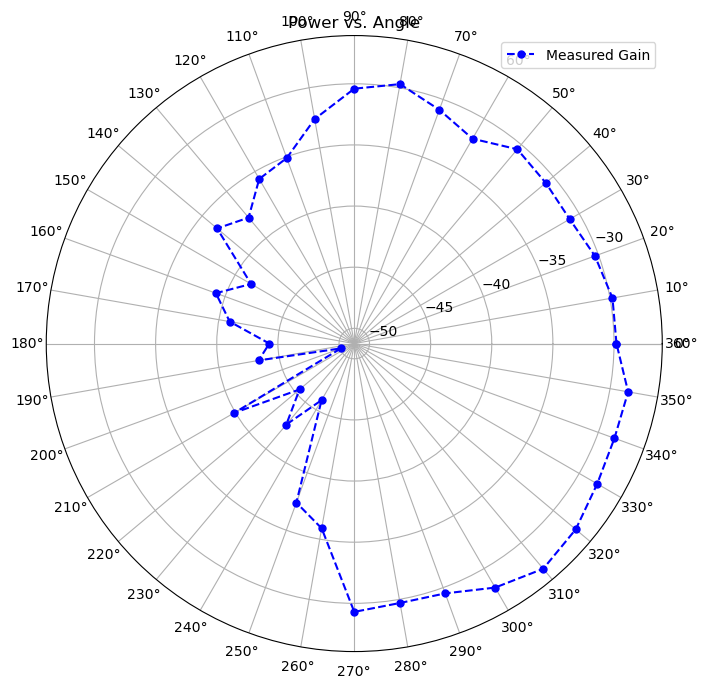

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the Excel file
file_path = 'Antenna.xlsx'  # Replace with your actual file path
df = pd.read_excel(file_path, sheet_name='Sheet1')  # Load data from 'Sheet1'

# Print DataFrame for verification
print(df)

# Extract angle and power values
angle_deg = df['Angle(deg)'].to_numpy()
angle_rad = np.radians(angle_deg)  # Convert degrees to radians
power = df['Power(dBm)'].to_numpy()

# Create a polar plot
plt.figure(figsize=(8, 8))
ax = plt.subplot(111, projection='polar')
ax.plot(angle_rad, power, 'bo--', markersize=5, label='Measured Gain')  # Use correct angle format

# Set the angle labels
ax.set_thetagrids(angle_deg, labels=[f"{int(a)}°" for a in angle_deg])

# Improve the layout
plt.title('Power vs. Angle')
plt.grid(True)
plt.legend()

# Show the plot
plt.show()


Maximum Power: -28.79 dBm
-3 dB Threshold: -31.79 dBm


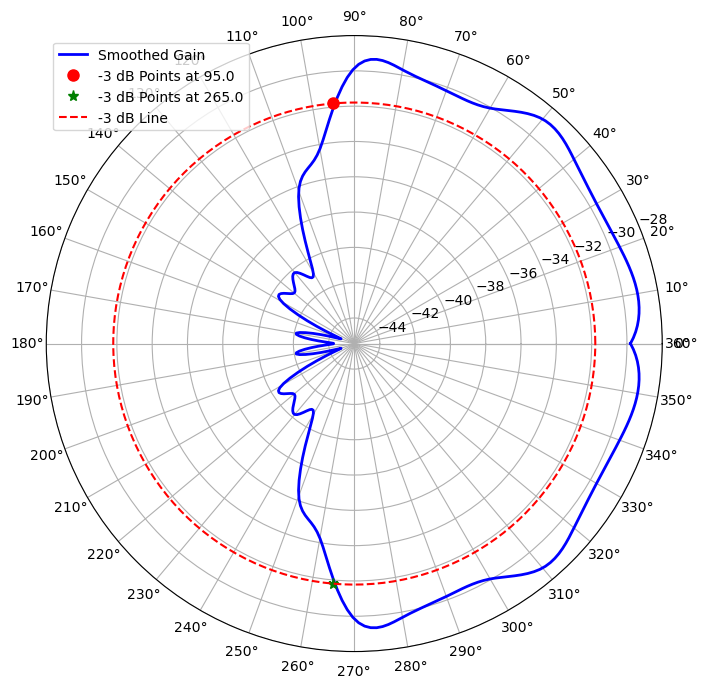

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

# Load the Excel file
file_path = 'Antenna.xlsx'  # Replace with your actual file path
df = pd.read_excel(file_path, sheet_name='Sheet1')  # Load data from 'Sheet1'

# Extract angle and power values
angle_deg = df['Angle(deg)'].to_numpy()
power = df['Power(dBm)'].to_numpy()
power = ( power+np.flip(power) ) /2

# Interpolation for Smoothing
angle_smooth = np.linspace(min(angle_deg), max(angle_deg), 300)  # Generate smooth angle points
power_spline = CubicSpline(angle_deg, power)  # Create cubic spline function
power_smooth = power_spline(angle_smooth)  # Get smooth power values

# Convert to radians for polar plotting
angle_rad = np.radians(angle_smooth)

# Find the maximum power and -3 dB threshold
max_power = np.max(power_smooth)
threshold = max_power - 3

# Find angles where power drops to threshold
indices_below_threshold = np.where(power_smooth <= threshold)[0]
indices_below_threshold = np.sort(indices_below_threshold)
# Locate the closest angles where power crosses -3 dB
max_index = np.argmax(power_smooth)

smaller_angle = angle_smooth[indices_below_threshold[0]]
greater_angle = angle_smooth[indices_below_threshold[-1]]

# Print results
print(f"Maximum Power: {max_power:.2f} dBm")
print(f"-3 dB Threshold: {threshold:.2f} dBm")

# Plotting
plt.figure(figsize=(8, 8))
ax = plt.subplot(111, projection='polar')

# Smooth Power Curve
ax.plot(angle_rad, power_smooth, 'b-', linewidth=2, label='Smoothed Gain')

# Highlight -3 dB Points
if smaller_angle is not None:
    ax.plot(np.radians(smaller_angle), threshold, 'ro', markersize=8, label=f'-3 dB Points at {np.round(smaller_angle)}')
if greater_angle is not None:
    ax.plot(np.radians(greater_angle), threshold, 'g*', markersize=8,label=f'-3 dB Points at {np.round(greater_angle)}')

# Draw a -3 dB Threshold Line
ax.plot(angle_rad, [threshold] * len(angle_rad), 'r--', label='-3 dB Line')

# Set Angle Labels
ax.set_thetagrids(angle_deg, labels=[f"{int(a)}°" for a in angle_deg])

# Formatting
#plt.title('Smoothed Power Pattern with -3 dB Points')
plt.legend()
plt.grid(True)

# Show the Plot
plt.show()
